In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# z-score

In [2]:
data = np.random.normal(50, 10, 60).round()
data

array([25., 33., 51., 47., 58., 57., 49., 49., 46., 64., 75., 50., 41.,
       57., 61., 62., 66., 49., 40., 54., 58., 53., 59., 60., 54., 69.,
       57., 53., 42., 52., 46., 58., 62., 43., 57., 46., 48., 50., 49.,
       56., 39., 38., 51., 42., 42., 44., 69., 50., 45., 49., 52., 51.,
       46., 60., 71., 53., 65., 54., 54., 47.])

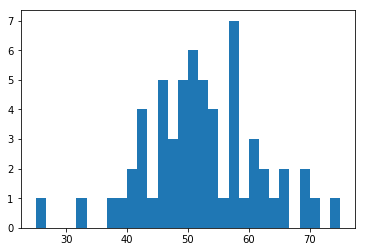

In [3]:
plt.hist(data, 30)
plt.show()

In [4]:
z_score = stats.zscore(data)
z_score

array([-2.925598  , -2.06301382, -0.12219943, -0.55349151,  0.63256173,
        0.52473871, -0.33784547, -0.33784547, -0.66131454,  1.27949986,
        2.46555311, -0.23002245, -1.20042965,  0.52473871,  0.9560308 ,
        1.06385382,  1.49514591, -0.33784547, -1.30825267,  0.20126964,
        0.63256173,  0.09344662,  0.74038475,  0.84820777,  0.20126964,
        1.81861497,  0.52473871,  0.09344662, -1.09260663, -0.0143764 ,
       -0.66131454,  0.63256173,  1.06385382, -0.9847836 ,  0.52473871,
       -0.66131454, -0.44566849, -0.23002245, -0.33784547,  0.41691569,
       -1.41607569, -1.52389871, -0.12219943, -1.09260663, -1.09260663,
       -0.87696058,  1.81861497, -0.23002245, -0.76913756, -0.33784547,
       -0.0143764 , -0.12219943, -0.66131454,  0.84820777,  2.03426102,
        0.09344662,  1.38732289,  0.20126964,  0.20126964, -0.55349151])

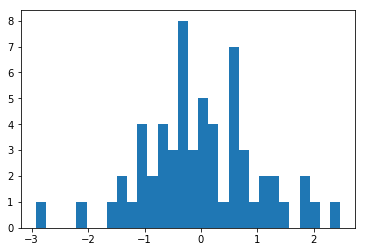

In [5]:
plt.hist(z_score, 30)
plt.show()

# cumulative distribution function

In [6]:
z_score = 1.96
stats.norm.cdf(z_score)

0.9750021048517795

# percent point function

In [7]:
stats.norm.ppf(0.9750021048517795)

1.959999999999999

# p-value

In [8]:
z_score = 1.96
p_value = 1 - stats.norm.cdf(z_score)
p_value

0.024997895148220484

# standard error of the mean

In [9]:
data = np.random.normal(50, 10, 60)
stats.sem(data)

1.3197936718999825

# correlation coefficient

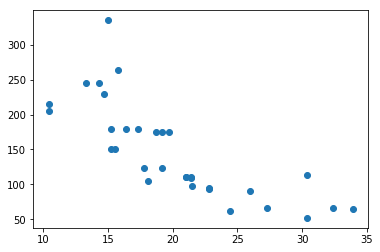

In [10]:
data_0 = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4,
33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]
data_1 = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245,
175, 66, 91, 113, 264, 175, 335, 109]
plt.scatter(data_0, data_1)
plt.show()

In [11]:
r, p_value = stats.pearsonr(data_0, data_1)
(r, p_value)

(-0.7761683718265864, 1.7878352541210664e-07)

In [12]:
r, p_value = stats.spearmanr(data_0, data_1)
(r, p_value)

(-0.8946646457499626, 5.085969430924412e-12)

# t-test

In [13]:
data_0 = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])
data_1 = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])
t_statistic, p_value = stats.ttest_ind(data_0, data_1)
(t_statistic, p_value)

(-5.458195056848408, 3.482072285015316e-05)